In [2]:
import numpy as np 
from sklearn.mixture import GMM
import sklearn.mixture as Mix
from scipy.stats import multivariate_normal as MNorm

import matplotlib.pyplot as plt
%matplotlib inline

First lets generate some distribution we're trying to fit.

In [5]:
np.random.seed(1)

gmm = GMM(3)
gmm.means_ = np.array([[-1], [0], [3]])
gmm.covars_ = np.array([[1.5], [1], [0.5]]) ** 2
gmm.weights_ = np.array([0.4, 0.2, 0.4])

X = gmm.sample(10)

/Users/chang/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
print X

[[-0.38405435]
 [ 2.45005437]
 [ 1.61721765]
 [-2.14181035]
 [-0.52144136]
 [-1.37405556]
 [ 1.19316191]
 [-4.09021106]
 [-1.48362581]
 [ 1.13376944]]


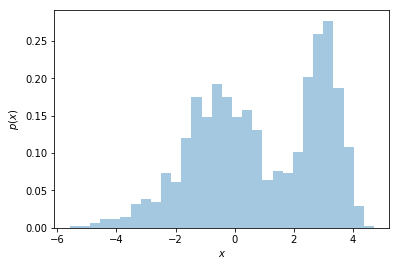

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(X, 30, normed=True, histtype='stepfilled', alpha=0.4)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

In [4]:
g = Mix.GaussianMixture(n_components=3)

In [5]:
g.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [6]:
print g.weights_, g.means_, g.covariances_

[ 0.41139324  0.2230385   0.36556827] [[ 2.98998463]
 [-1.64237002]
 [-0.02734579]] [[[ 0.31916715]]

 [[ 1.63125893]]

 [[ 0.92011384]]]


In [7]:
print g.bic(X)

4001.32609839


2.98998463446 0.319167149421


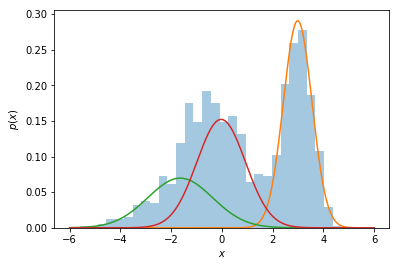

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(X, 30, normed=True, histtype='stepfilled', alpha=0.4)
x = np.linspace(-6, 6, 1000)
print g.means_[0][0], g.covariances_[0][0][0]
for i in range(len(g.weights_)): 
    ax.plot(x, g.weights_[i]*MNorm.pdf(x, g.means_[i][0], g.covariances_[i][0][0]))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

In [10]:
g2 = Mix.GaussianMixture(n_components=2)
g2.fit(X)
g2.bic(X)

3983.4260407698162

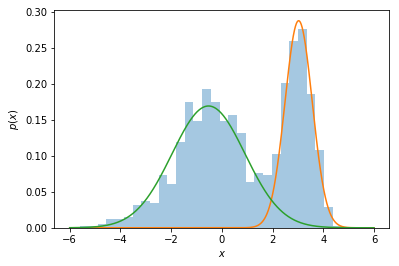

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(X, 30, normed=True, histtype='stepfilled', alpha=0.4)
x = np.linspace(-6, 6, 1000)
for i in range(len(g2.weights_)): 
    ax.plot(x, g2.weights_[i]*MNorm.pdf(x, g2.means_[i][0], g2.covariances_[i][0][0]))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

In [13]:
g1 = Mix.GaussianMixture(n_components=1)
g1.fit(X)
g1.bic(X)

4329.2802277829996

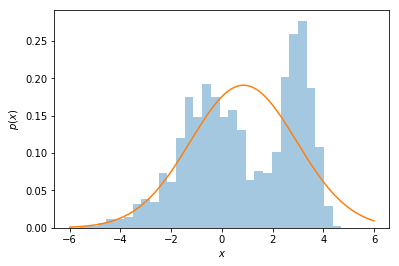

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(X, 30, normed=True, histtype='stepfilled', alpha=0.4)
x = np.linspace(-6, 6, 1000)
for i in range(len(g1.weights_)): 
    ax.plot(x, g1.weights_[i]*MNorm.pdf(x, g1.means_[i][0], g1.covariances_[i][0][0]))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')